# Visualize Confidence Intervals with Seaborn

Instead of using Python only for calculation, you could use it as a tool for *Exploratory Data Analysis* just like [Tableau](https://app.julie.academy/course/data-visualisation-e/data-visualisation-with-tableau-e) ! 😲 🤩 To do so, we can use a library called [`seaborn`](https://seaborn.pydata.org/). Let's check out a few features of it. 


## What you will learn in this course 🧐🧐

* Use basic features of `seaborn`
* Create bar charts with `seaborn`
* Visualize confidence intervals 

## Import classic libraries 📓

Let's first import classic libraries for Data Science: `pandas`, `numpy` and `seaborn`

In [2]:
# Import of libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats 

## Dataset 

Now let's say we have the following dataset describing how many kilometers some people travel to commute to work every morning. 

In [3]:
# Build and Visualize Dataset
df = pd.read_csv("../data/km_traveled_all_transportations.csv").iloc[:,1:]
df.head()

,type_of_transport,Km_traveled
0,uber,34
1,bike,30
2,uber,22
3,bike,17
4,bike,29


As you can see, our dataset is composed of `type_of_transport` and `km_traveled` per transport for each observation. Now what we need to know is the average `km_traveled` per transport. Therefore, we can use `.groupby` method in `pandas` that works exactly the same way as `GROUP BY` in SQL. 

In [4]:
# Percentage of conversions 
df.groupby("type_of_transport").mean()

,Km_traveled
type_of_transport,
bike,23.125
bus,59.625
car,49.875
uber,40.375


Now the nice thing about this is that we can visualize our dataset using a library called `seaborn`. There is indeed one function called `pointplot` which will automatically display the mean for each category as points, along with confidence intervals shown as error bars. This gives us a clean visualization that clearly shows both the central tendency and the uncertainty around our estimates for each transport type.

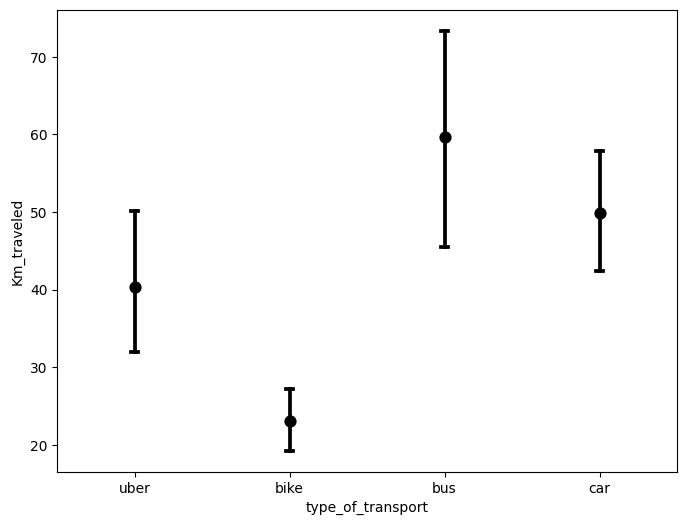

In [5]:
# Visualisation of mean km traveled per transport type with 95% confidence interval

# Create the figure and axis
plt.figure(figsize=(8, 6))

# Use pointplot with error bars and no joining lines
sns.pointplot(
    x="type_of_transport", 
    y="Km_traveled", 
    data=df,
    estimator=np.mean, 
    errorbar=('ci', 95),  # 85% confidence interval
    linestyle='none',      # No lines connecting points
    markers="o",           # Circle markers
    color="black",
    capsize=0.05         # Add caps to error bars
)

plt.show()

As you can see the black lines at the end of each bar represent your confidence interval. Meaning your true mean lies between these lines. Now, let's see how we can reduce this confidence interval.

Now we set up a confidence level $\alpha = 0.15$ and now we have way lower confidence intervals ! 

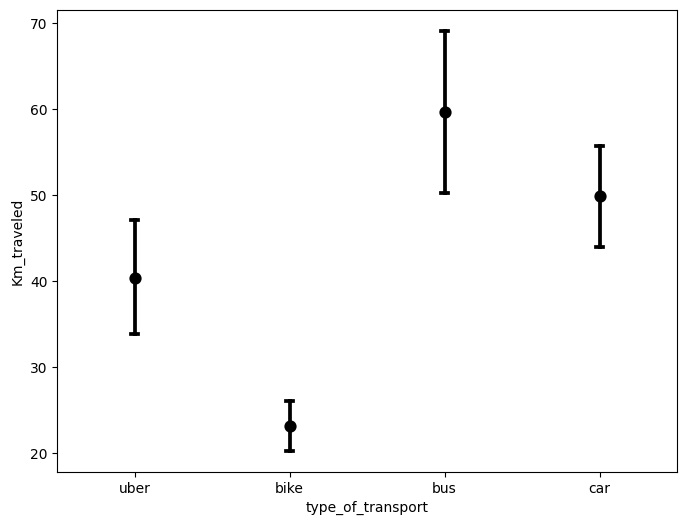

In [6]:
# Visualisation of mean km traveled per transport type with 95% confidence interval

# Create the figure and axis
plt.figure(figsize=(8, 6))

# Use pointplot with error bars and no joining lines
sns.pointplot(
    x="type_of_transport", 
    y="Km_traveled", 
    data=df,
    estimator=np.mean, 
    errorbar=('ci', 85),  # 85% confidence interval
    linestyle='none',        # No lines connecting points
    markers="o",            # Circle markers
    color="black",
    capsize=0.05         # Add caps to error bars
)

plt.show()

## Confidence intervals with category in columns 

Now as a final note, your dataset won't always look like the one above. Sometimes, your categories will be in column just like the below dataset:

In [7]:
df = pd.read_csv("../data/km_traveled_per_transport.csv").iloc[:,1:]
df.head()

,bike,bus,car,uber
0,21,75,55,22
1,30,87,34,34
2,17,49,38,38
3,30,68,66,66
4,24,75,56,56


Now you will need to do a little bit more of manual work by selecting a `t-value` yourself and then specify it within a `.plot` function in `pandas`

👋  as a reminder, you need to compute the margin of error. Here is the formula for mean: 

$$E = t \frac{s}{\sqrt{n}}$$

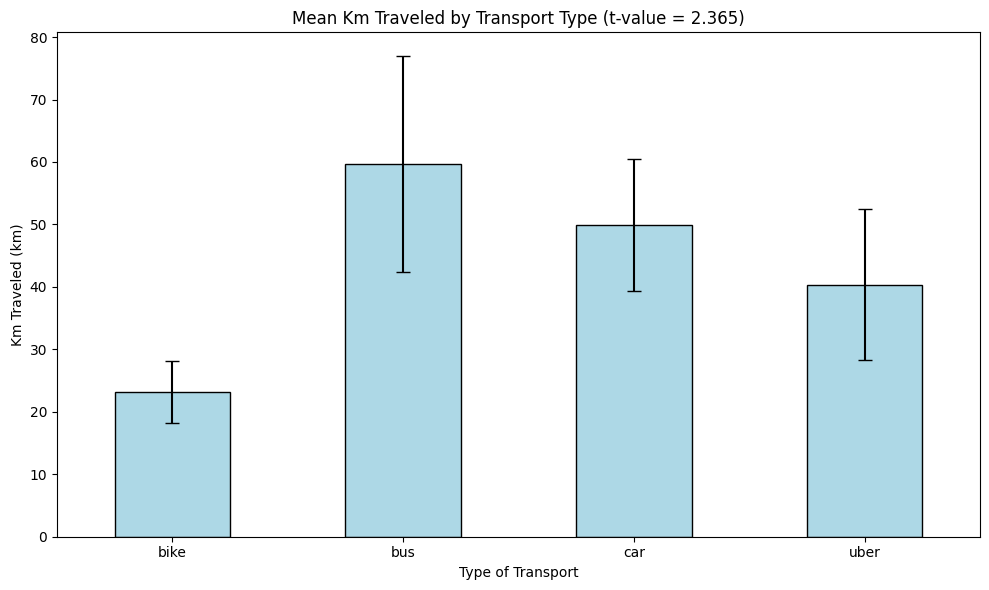

Manual Confidence Interval Calculation:
t-value chosen: 2.365
Statistics by Transport Type:
                     mean     std  count  margin_of_error
type_of_transport                                        
bike               23.125   5.963      8            4.986
bus                59.625  20.674      8           17.287
car                49.875  12.586      8           10.524
uber               40.375  14.441      8           12.075


In [8]:
# Reshape the data
df_long = df.melt(var_name='type_of_transport', value_name='Km_traveled')

# Calculate basic statistics for each transport type
grouped_stats = df_long.groupby('type_of_transport')['Km_traveled'].agg(['mean', 'std', 'count'])

# MANUAL STEP: Choose your t-value yourself
# For 95% confidence interval with n=8 (df=7): t ≈ 2.365
# For 90% confidence interval with n=8 (df=7): t ≈ 1.895  
# For 99% confidence interval with n=8 (df=7): t ≈ 3.499
t_value = 2.365  # <-- YOU choose this value!

# Calculate margin of error manually: E = t * (s / sqrt(n))
grouped_stats['margin_of_error'] = t_value * grouped_stats['std'] / np.sqrt(grouped_stats['count'])

# Create the plot using pandas .plot() function
ax = grouped_stats['mean'].plot(
    kind='bar',
    yerr=grouped_stats['margin_of_error'],  # This is where you specify the error bars
    capsize=5,                              # Add caps to error bars
    color='lightblue',
    edgecolor='black',
    figsize=(10, 6),
    title=f'Mean Km Traveled by Transport Type (t-value = {t_value})'
)

# Customize the plot
ax.set_xlabel('Type of Transport')
ax.set_ylabel('Km Traveled (km)')
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

# Display your calculations
print("Manual Confidence Interval Calculation:")
print(f"t-value chosen: {t_value}")
print("Statistics by Transport Type:")
print(grouped_stats.round(3))

## Resources 📚📚

- Simple barplot of column means using seaborn  - [https://bit.ly/2JLmv1Sv](https://stackoverflow.com/questions/50337237/simple-barplot-of-column-means-using-seaborn)

- pandas.DataFrame.plot - [https://bit.ly/30CAS](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)

- Add 95% confidence intervals as error bars to pandas bar plot - [https://bit.ly/30CSAq](https://stackoverflow.com/questions/56776919/add-95-confidence-intervals-as-error-bars-to-pandas-bar-plot)
